## $\Large{Data\; Visualization \;(part2)}$

在介紹過matplotlib的功能後，我們大致上已經可以畫出各式各樣的圖形，但你可能會發現使用matplotlib套件時我們需要自己將一些基礎元件組裝起來才能畫出圖形(例如主標題、標籤等)，因此需要撰寫較大量的程式碼。為了讓使用者能夠更方便地進行資料視覺化，也有人以matplotlib作為底層開發了較高階的繪圖套件，在這個單元中我們要教的seaborn套件就是這樣的一個存在。

### 本章節內容大綱
* [載入套件](#載入套件)
* [繪製基本統計圖](#繪製基本統計圖)
* [繪製進階統計圖](#繪製進階統計圖)
    - [小提琴圖(Violin plot)](#小提琴圖)
    - [多變量圖(Pair plot)](#多變量圖)
    - [熱力圖(Heat map)](#熱力圖)
* [使用FacetGrid作分面繪圖](#使用FacetGrid作分面繪圖)
* [使用matplotlib作細部調整](#使用matplotlib做細部調整)

---
<a name="載入套件"></a>
## 載入套件

In [ ]:
# 載入seaborn套件並命名為sns
import seaborn as sns

# 載入matplotlib中的pypplot模組並且命名為plt
import matplotlib.pyplot as plt

# 由於繪圖需要資料，在此同時載入numpy套件與pandas套件
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
# 讀取資料，在此同樣以鐵達尼號資料為範例
df = pd.read_csv('https://raw.githubusercontent.com/ogrisel/parallel_ml_tutorial/master/notebooks/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
<a name="繪製基本統計圖"></a>
## 繪製基本統計圖

同樣地，我們先來看看在seaborn中如何繪製基本的統計圖形，然而在此我們會試著增加一些進階的設定使圖形有更多的資訊量。

- ### 直方圖

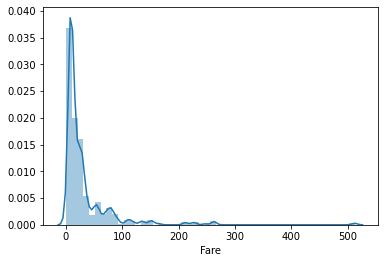

In [ ]:
# 以distplot繪製Fare的直方圖，預設同時也會呈現機率密度函數之估計
sns.distplot(df['Fare'])

- ### 盒型圖

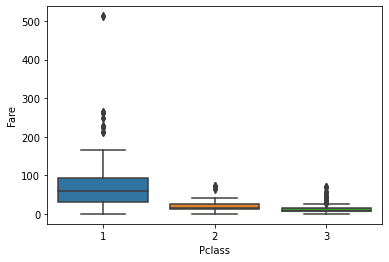

In [ ]:
# 使用boxplot可繪製盒型圖，另外可以x參數設定盒型圖的分組依據
sns.boxplot(x=df['Pclass'], y=df['Fare'])

- ### 長條圖

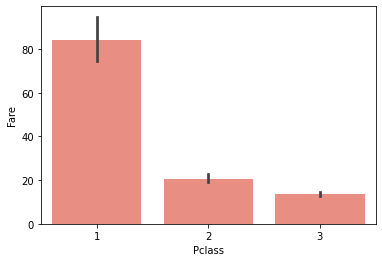

In [ ]:
# 使用barplot繪製長條圖呈現不同艙等(Pclass)中票價(Fare)的平均
# 在此我們結合了pandas與seaborn套件作繪圖，在參數內只需要指定欄位名稱並給予資料即可，另外可以指定顏色
sns.barplot(x='Pclass', y='Fare', data=df, color='salmon')

- ### 散佈圖

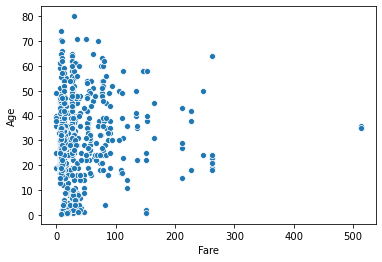

In [ ]:
# 使用scatterplot繪製散佈圖，另一種類似的函數是regplot，但它會自動作回歸線的估計
sns.scatterplot(x='Fare', y='Age', data=df)

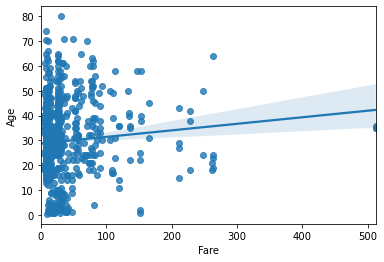

In [ ]:
# 使用scatterplot繪製散佈圖，另一種類似的函數是regplot，但它會自動作回歸線的估計
sns.regplot(x='Fare', y='Age', data=df)

---
<a name="繪製進階統計圖"></a>
## 繪製進階統計圖

除了最基本的統計圖表外，在資料視覺化上為了一次能在圖中呈現較多資訊、或是作多個變項的關聯性呈現，也有許多進階的統計圖陸續被提出。而seaborn套件的強大威力就在於可快速地協助我們繪製這些進階的圖形，以下我們將介紹三個非常常被使用到的圖形，分別為小提琴圖(violin plot)、多變量圖(pair plot)、以及熱點圖(heatmap)。

<a name="小提琴圖"></a>
- ### 小提琴圖
小提琴圖可用來比較不同組別中特定連續變項的分布是否有差異，如下圖我們可以同時考慮不同艙等(Pclass)與性別(Sex)的乘客在年齡上的分布。

    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

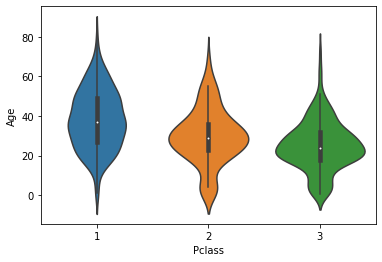

In [ ]:
# 使用violinplot繪製小提琴圖
sns.violinplot(x='Pclass', y='Age', data=df)

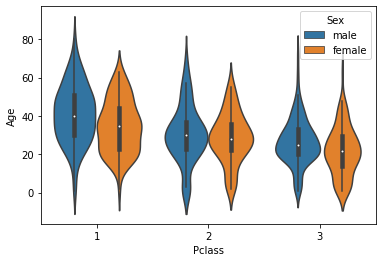

In [ ]:
# 使用violinplot繪製小提琴圖
sns.violinplot(x='Pclass', y='Age', data=df, hue='Sex')

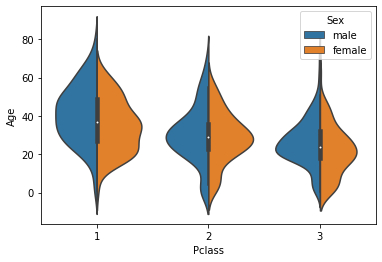

In [ ]:
# 使用violinplot繪製小提琴圖
sns.violinplot(x='Pclass', y='Age', data=df, hue='Sex', split=True)

<a name="多變量圖"></a>
- ### 多變量圖
如果我們想要一次觀察資料中連續變項的分布和彼此之間的散佈圖，我們可以使用多變量圖(pairplot)來做觀察。如圖所示，對角線部分是各個欄位的直方圖、其餘部分則是兩兩變項的散佈圖。另外一個很類似的圖形則是jointplot，差異在於單次只能看兩個連續變項。

    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

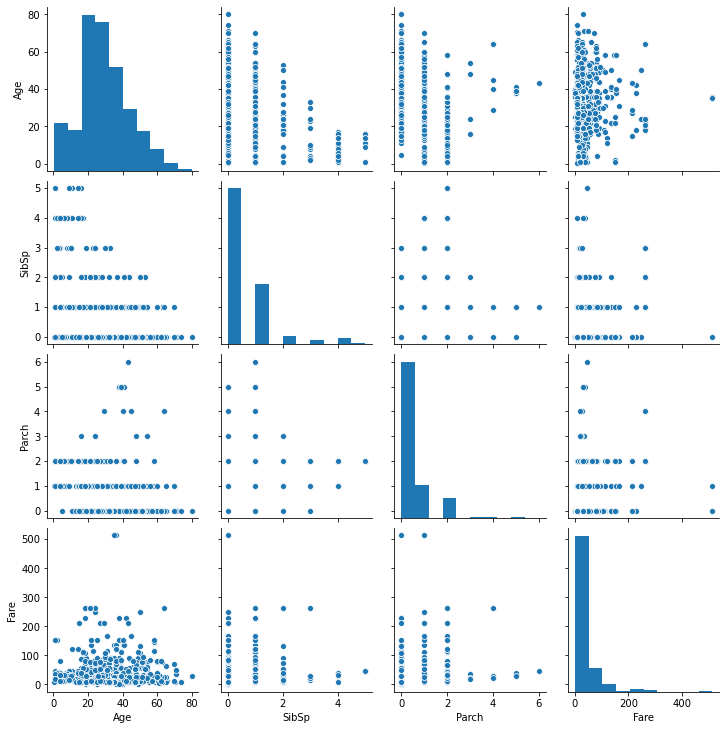

In [ ]:
# 使用pairplot繪製資料的多變量圖

# 只選取連續類型的變項
plot_df = df[['Age', 'SibSp', 'Parch', 'Fare']].dropna()
sns.pairplot(data=plot_df)

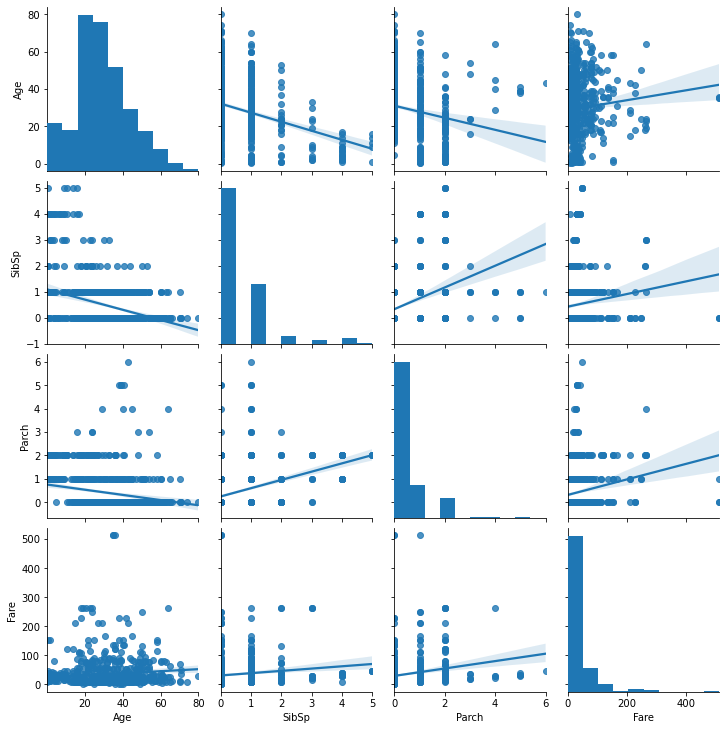

In [ ]:
# 我們也可以使用kind參數改變非對角線的圖形類型
plot_df = df[['Age', 'SibSp', 'Parch', 'Fare']].dropna()
sns.pairplot(data=plot_df, kind='reg')

<a name="熱力圖"></a>
- ### 熱力圖
熱力圖則可以同時考慮兩個類別變項，並且呈現各個分組下的某個特定數值，例如我們可以使用熱力圖觀察各個艙等(Pclass)和性別(Sex)的乘客平均存活率
    - [官方網頁與範例](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

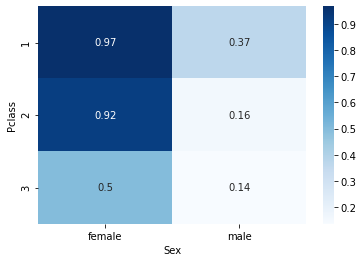

In [ ]:
# 事先將資料整理為需要的樣態，在這邊我們利用了Pandas課程時教到的pivot_table
plot_data = df.pivot_table(values='Survived', index='Pclass', columns='Sex')

# 使用heatmap繪製不同艙等與性別的平均存活率，並且修改顏色與加上數值標誌
sns.heatmap(plot_data, cmap="Blues", annot=True)

In [ ]:
plot_data

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


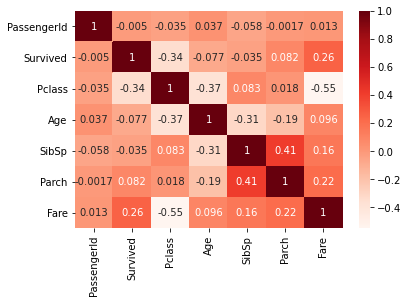

In [ ]:
# 我們也可以利用熱力圖觀察變項之間的相關係數
plot_data = df.corr()

# 繪製資料的相關係數矩陣熱力圖
sns.heatmap(plot_data, cmap='Reds', annot=True)

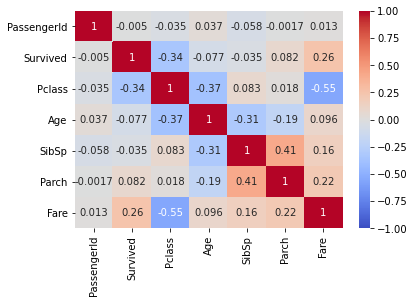

In [ ]:
# 我們也可以利用熱力圖觀察變項之間的相關係數
plot_data = df.corr()

# 繪製資料的相關係數矩陣熱力圖 (vmin 和 vmax 可按照右邊尺規調整顏色)
sns.heatmap(plot_data, cmap='coolwarm', annot=True, vmin=-1.0, vmax=1.0)

---
<a name="使用FacetGrid作分面繪圖"></a>
## 使用FacetGrid作分面繪圖
在seaborn中，若我們想依據特定欄位的組別每一組畫一張圖，我們可以使用FacetGrid的方式做繪製。在使用上我們大多數會搭配著matplotlib的基礎統計圖做使用。例如在以下範例中，我們希望依照性別(Sex)與艙等(Pclass)的各個組合分別繪製年齡的直方圖。

- [官方文件與範例](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

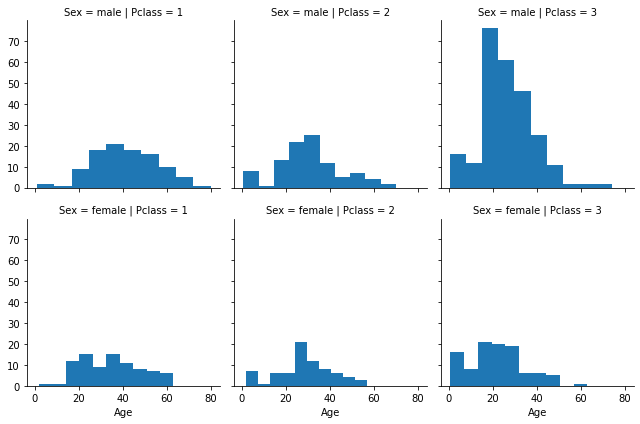

In [ ]:
# 使用FacetGrid 搭配 matplotlib.pyplot 中的直方圖做繪製

# 建立FacetGrid物件並且指定欄與列的分組變項
g = sns.FacetGrid(data=df, row='Sex',  col='Pclass')

# 在建立好的物件中加入直方圖並且指定要繪製的變項名稱
g = g.map(plt.hist, 'Age')

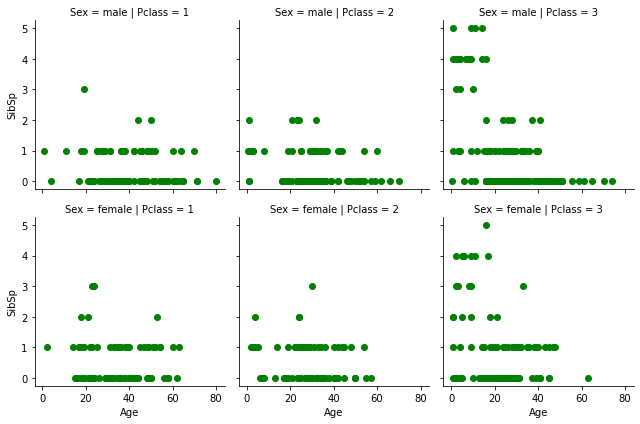

In [ ]:
# 依據性別與艙等觀察年齡與手足/伴侶同在船上數量的關聯

# 建立FacetGrid物件並且指定欄與列的分組變項
g = sns.FacetGrid(data=df, row='Sex', col='Pclass')

# 使用plt.scatter做繪製，相關的調整參數只要加在後面即可做調整
g = g.map(plt.scatter, 'Age', 'SibSp', color='green')

---
<a name="使用matplotlib做細部調整"></a>
## 使用matplotlib做細部調整

雖然seaborn提供了簡潔方便又美觀的繪圖方式，然而在某些時刻我們仍然需要進行些許的調整或使用seaborn未提供的方法以符合需求。由於先前提到seaborn是依據matplotlib為底層進行繪製的高階繪圖套件，因此兩者可相容。因此除了直接全部只用matplotlib的低階繪圖函數之外，我們也可以搭配著seaborn與matplotlib一起使用。

- ### 增加文字

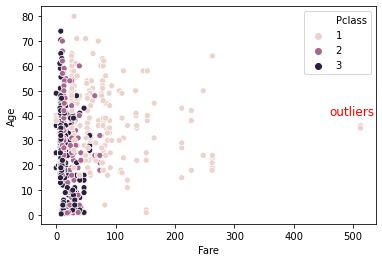

In [ ]:
# 使用高階繪圖套件seaborn繪圖
sns.scatterplot(data=df, x='Fare', y='Age', hue='Pclass', legend='full')

# 使用低階套件matplotlib.pyplot加上文字
plt.text(460, 40, 'outliers', fontsize=12, color='red')
plt.show()

- ### 儲存圖片

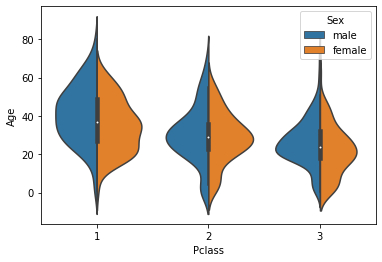

In [ ]:
# 使用高階繪圖套件seaborn繪圖
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True)

# 使用plt.save方法儲存此圖片
plt.savefig('violinplot_example.png')

## 資料視覺化小結

在這兩個部分中我們介紹了matplotlib與seaborn套件，以及如何繪製常見的統計圖。然而資料視覺化的精隨其實在於如何決定繪製何種圖表以利於增加我們對資料的認識，這部分就得靠大家的領域知識、經驗累積、甚至是創意發想，若有想法而不知該如何實踐的話，也不妨去參考他人的教學或是創意唷。

### 一些好用的參考網站
- [The Python Graph Gallery](https://python-graph-gallery.com/)
- [另一個非常完整的視覺化套件: Plotly](https://plot.ly/python/)
- [Top 50 matplotlib Visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)